In [61]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
%matplotlib inline

In [37]:
df=pd.read_csv('Churn_Modelling.csv')

In [38]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data exploration

In [39]:
df.drop(['RowNumber','CustomerId'],axis=1,inplace=True)
df.dtypes

Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [40]:
df.isnull().sum()

Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [41]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


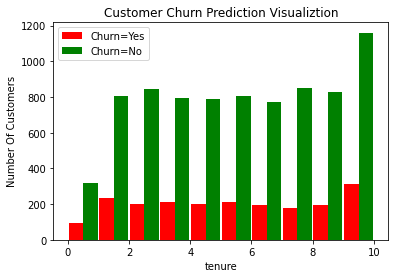

In [42]:
tenure_churn_no = df[df.Exited==0].Tenure
tenure_churn_yes = df[df.Exited==1].Tenure #customers which are not leaving the company

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")


plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [43]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [44]:
df.drop(['Surname'],axis=1,inplace=True)

In [45]:
def print_unique_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

print_unique_values(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


# Lets try here two approch here

In [46]:
df2=df.copy()

In [47]:
#Converting Gender into binary
df['Gender'].replace({'Female': 0, 'Male': 1}, inplace= True)

df['Geography'].replace({'France': 0, 'Spain': 1,'Germany':2}, inplace= True)

In [48]:
df.dtypes

CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [50]:
c_to_scale= ['CreditScore','Age','Balance','EstimatedSalary','Tenure']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[c_to_scale] = scaler.fit_transform(df[c_to_scale])

In [63]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [53]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,0,0,0.324324,0.2,0.000000,1,1,1,0.506735,1
1,0.516,1,0,0.310811,0.1,0.334031,1,0,1,0.562709,0
2,0.304,0,0,0.324324,0.8,0.636357,3,1,0,0.569654,1
3,0.698,0,0,0.283784,0.1,0.000000,2,0,0,0.469120,0
4,1.000,1,0,0.337838,0.2,0.500246,1,1,1,0.395400,0


In [52]:
#Train Test Split
X= df.drop('Exited', axis='columns')
y= df['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)
X_train.shape

(8000, 10)

In [68]:
from sklearn.model_selection import GridSearchCV

param_grid = {  'C':[100, 10, 1.0, 0.1, 0.01]}


In [69]:
from sklearn.ensemble import RandomForestClassifier
lr = LogisticRegression(random_state=0,class_weight='Balanced')

g_search = GridSearchCV(estimator = lr, param_grid = param_grid, 

                          cv = 3, n_jobs = 1, verbose = 3, return_train_score=True)
g_search.fit(X_train, y_train);

print(g_search.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] C=100 ...........................................................
[CV] ........... C=100, score=(train=0.814, test=0.810), total=   0.1s
[CV] C=100 ...........................................................
[CV] ........... C=100, score=(train=0.812, test=0.814), total=   0.1s
[CV] C=100 ...........................................................
[CV] ........... C=100, score=(train=0.812, test=0.814), total=   0.1s
[CV] C=10 ............................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ............ C=10, score=(train=0.814, test=0.810), total=   0.1s
[CV] C=10 ............................................................
[CV] ............ C=10, score=(train=0.811, test=0.815), total=   0.1s
[CV] C=10 ............................................................
[CV] ............ C=10, score=(train=0.812, test=0.815), total=   0.1s
[CV] C=1.0 ...........................................................
[CV] ........... C=1.0, score=(train=0.813, test=0.811), total=   0.0s
[CV] C=1.0 ...........................................................
[CV] ........... C=1.0, score=(train=0.812, test=0.815), total=   0.1s
[CV] C=1.0 ...........................................................
[CV] ........... C=1.0, score=(train=0.812, test=0.813), total=   0.1s
[CV] C=0.1 ...........................................................
[CV] ........... C=0.1, score=(train=0.816, test=0.807), total=   0.1s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.8s finished


In [70]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,class_weight='Balanced',C=0.1)

In [71]:
clf.fit(X_train,y_train)

LogisticRegression(C=0.1, class_weight='Balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
ypredtr=clf.predict(X_train)
ypredts=clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.99      0.82      0.89      7666
           1       0.15      0.72      0.24       334

    accuracy                           0.81      8000
   macro avg       0.57      0.77      0.57      8000
weighted avg       0.95      0.81      0.87      8000



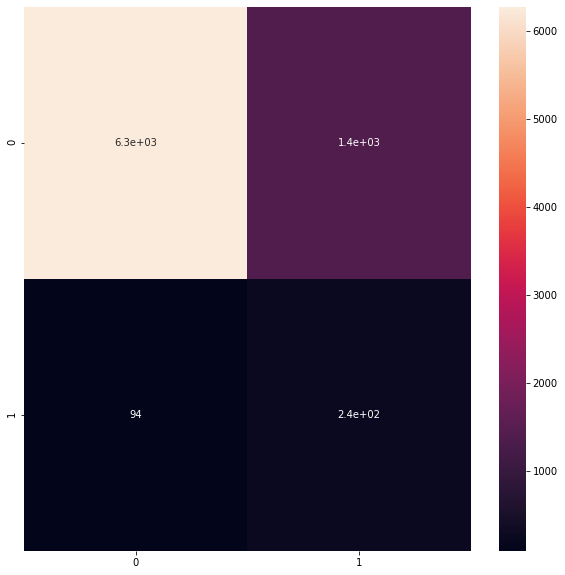

In [73]:

cm = confusion_matrix(ypredtr,y_train)
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(data = cm, annot=True,ax=ax)

report = classification_report(ypredtr, y_train)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.81      0.89      1931
           1       0.12      0.68      0.20        69

    accuracy                           0.81      2000
   macro avg       0.55      0.75      0.55      2000
weighted avg       0.96      0.81      0.87      2000



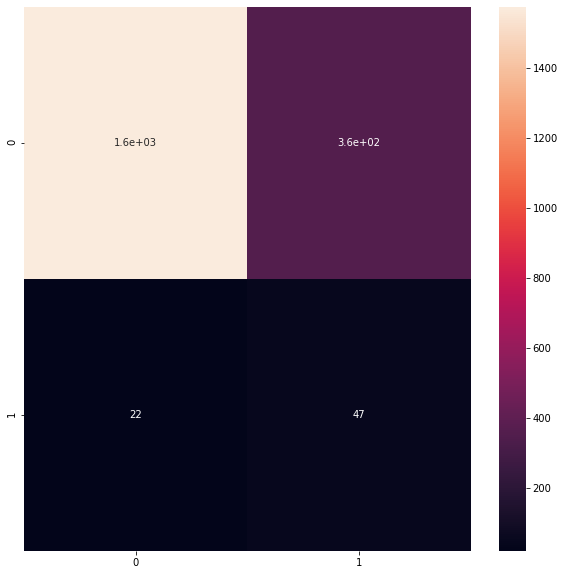

In [79]:

cm = confusion_matrix(ypredts,y_test)
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(data = cm, annot=True,ax=ax)

report = classification_report(ypredts,y_test)
print(report)

# Now lets implemnt SMOTE technique

In [74]:
df2.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [75]:
#Converting Gender into binary
df2['Gender'].replace({'Female': 0, 'Male': 1}, inplace= True)

df2['Geography'].replace({'France': 0, 'Spain': 1,'Germany':2}, inplace= True)

In [76]:
c_to_scale= ['CreditScore','Age','Balance','EstimatedSalary','Tenure']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[c_to_scale] = scaler.fit_transform(df2[c_to_scale])

In [77]:
#Train Test Split
X= df.drop('Exited', axis='columns')
Y= df['Exited']

In [78]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=42)
X,Y = smk.fit_resample(X, Y)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=5)
X_train.shape

(12456, 10)

In [85]:
from sklearn.linear_model import LogisticRegression
clf2 = LogisticRegression(random_state=0,C=0.1)

In [86]:
clf.fit(X_train,y_train)

LogisticRegression(C=0.1, class_weight='Balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [87]:
ypredtr2=clf.predict(X_train)
ypredts2=clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.71      0.71      0.71      6214
           1       0.71      0.71      0.71      6242

    accuracy                           0.71     12456
   macro avg       0.71      0.71      0.71     12456
weighted avg       0.71      0.71      0.71     12456



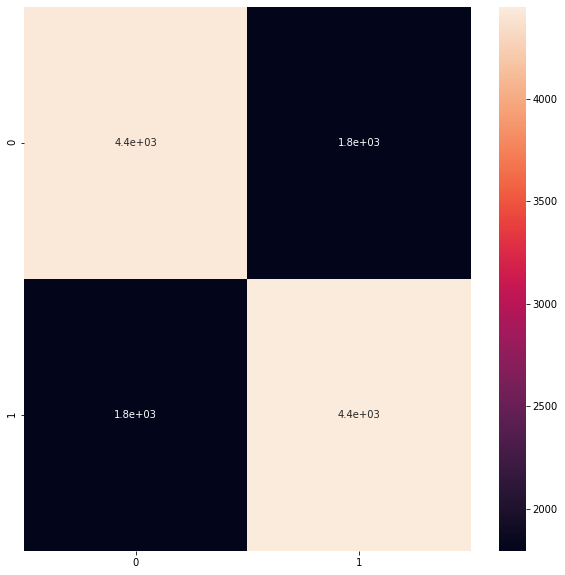

In [88]:

cm = confusion_matrix(ypredtr2,y_train)
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(data = cm, annot=True,ax=ax)

report = classification_report(ypredtr2, y_train)
print(report)

              precision    recall  f1-score   support

           0       0.73      0.72      0.73      1592
           1       0.71      0.72      0.72      1522

    accuracy                           0.72      3114
   macro avg       0.72      0.72      0.72      3114
weighted avg       0.72      0.72      0.72      3114



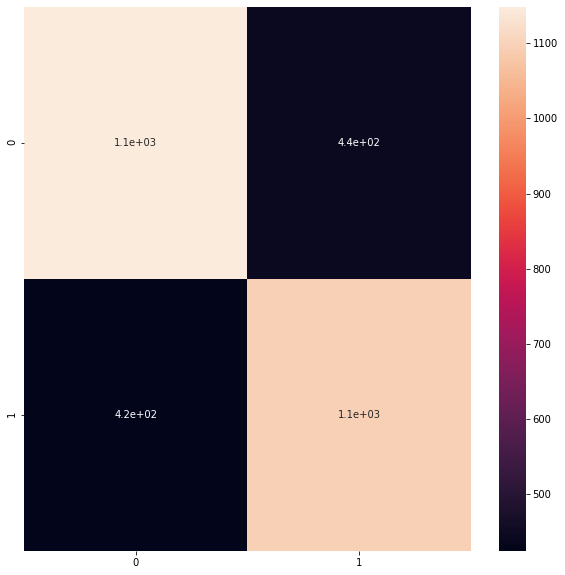

In [89]:

cm = confusion_matrix(ypredts2,y_test)
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(data = cm, annot=True,ax=ax)

report = classification_report(ypredts2,y_test)
print(report)